# The Impact of Coronavirus
- Team Wild Card: Shambhavi Danayak, William Kopec, Chinmay Wadnerkar, Ian Lulu

### Important Links for the project
- Github Repository:https://github.com/uic-cs418/cs418-spring22-the-wild-card
- Data sources: <br>
1) https://covid19.who.int/WHO-COVID-19-global-data.csv <br>
2) https://covid19.who.int/who-data/vaccination-data.csv

### Project Overview
The Impact of Vaccines on Covid-19 Death Rates<br>
Covid-19 Pandemic affected the entire globe for more than two years hence the need to understand the pandemic becomes important.The idea of this project is to analyze Covid-19 cases report database and vaccine database created by WORLD HEALTH ORGANIZATION (WHO) with the help of some Machine Learning Techniques and visualizaztions to get useful results. <br>
Analysis of the dataset could help research the impact of Covid-19 virus to answer a lot of questions such as:
- What was the impact of vaccination in the containment of the virus?
- Should anti-vaccination population consider changing their stance to get vaccinated?
- What is the death rate caused due to Covid-19 virus across various countries? Which country had the - highest impact and which had the lowest?
- How to better assist NGOs, healthcare companies and disease control institutions in combating COVID-19 and preventing future outbreaks?

### Problem Statement
How has Vaccination impacted the Coronavirus cases?

#### Importing required libraries 

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#### Reading and merging the Datasets, source: WHO 
-  We changed the WHO_region and Country in main to match the WHO_REGION and COUNTRY in vaccine.<br>
- We will analyze/visualize data for 237 countries featured in the main dataset.

In [15]:
main = pd.read_csv("WHO-COVID-19-global-data.csv")
main.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,1/3/2020,AF,Afghanistan,EMRO,0,0,0,0
1,1/4/2020,AF,Afghanistan,EMRO,0,0,0,0
2,1/5/2020,AF,Afghanistan,EMRO,0,0,0,0
3,1/6/2020,AF,Afghanistan,EMRO,0,0,0,0
4,1/7/2020,AF,Afghanistan,EMRO,0,0,0,0


In [16]:
vaccine = pd.read_csv("vaccination-data.csv")
vaccine.head(2)

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,Afghanistan,AFG,EMRO,REPORTING,2/27/2022,5535254,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,Albania,ALB,EURO,REPORTING,2/20/2022,2707658,1284034.0,94.100,45.118,1192155.0,41.889,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",1/13/2021,5.0


In [17]:
main = main.rename(columns={"WHO_region": "WHO_REGION", "Country": "COUNTRY"})
main = main.merge(vaccine, how='outer', on=['WHO_REGION', 'COUNTRY'])
main = main.dropna(subset=['Date_reported'])
main.head(2)

,Date_reported,Country_code,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,ISO3,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,1/3/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,1/4/2020,AF,Afghanistan,EMRO,0.0,0.0,0.0,0.0,AFG,REPORTING,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0


In [19]:
main.loc[:, "COUNTRY"].value_counts()[0:5] 

Afghanistan        781
Paraguay           781
Nigeria            781
Niue               781
North Macedonia    781
Name: COUNTRY, dtype: int64

#### EXPLORATORY DATA ANALYSIS
- Understanding the data
- Data cleaning as required
- Understanding relationships between variables, finding data discripencies etc.
- Finally maximizing or minimizing of the dataset to create useful results (This is processes is continued as required in the project)

In [22]:
## Dropping inessential columns
if 'Country_code' in main.columns and 'ISO3' in main.columns and 'DATA_SOURCE' in main.columns:
    main = main.drop(columns=['Country_code', 'ISO3', 'DATA_SOURCE'])
pd.set_option('display.max_rows', None) ##to see at first 100 rows and understand any trends in the dataset
main.head(2)

,Date_reported,COUNTRY,WHO_REGION,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED
0,1/3/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0
1,1/4/2020,Afghanistan,EMRO,0.0,0.0,0.0,0.0,2/27/2022,5535254.0,4907058.0,14.219,12.605,4231984.0,10.871,"Beijing CNBG - BBIBP-CorV,Janssen - Ad26.COV 2...",2/22/2021,4.0


<AxesSubplot:>

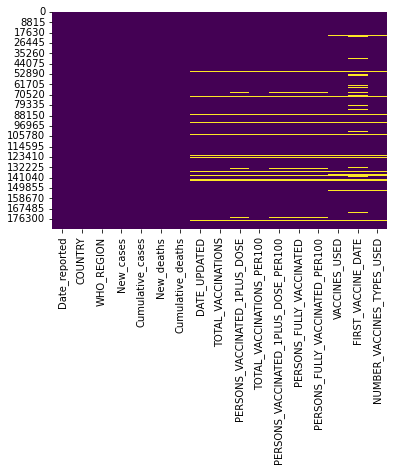

In [23]:
## Now we check for mising values 
main.isnull().sum()
sns.heatmap(main.isnull(),cbar=False,cmap='viridis')

##### INFERENCE: As we can see from the above heatmap the dataset does contain some missing/null values

In [24]:
##This is an example code which drops Nan values 
## When you scrollthrough the output list you see all are false meaning no nan values found)
##Such meaningful data cleaning techniques were done as required
main["DATE_UPDATED"].unique()
main= main.dropna(subset=["DATE_UPDATED"])
#main["DATE_UPDATED"].isnull()

### EXPLORATORY DATA ANALYSIS RESULTS
- **Understanding the data:** <br>
1) At first glance we can see our dataet has columns featuring reported cases,Date repoprted, cumulative deaths, vaccination dates etc. Then a simple heatmap was made to get a visual idea of how many missing/nan values are present in the data. <br>
2) Using pandas library features such as .dropna(), .isnull() etc. were used to drop/replace missing/nan values <br>
3) There are a total of 174944 entries in the dataset and a total of 17 columns. Data is of two types, float(64) or object(6).<br>
4) The dataset uses 24.0+ MB memory<br>
- **Data Granuality:** Covid cases are reported on a daily basis starting 1/3/2020 to 2/21/2022. 
- **Data Temporality:**  Since data is reported on a daily basis across the globe, the data is Spatiotemporal.
- **Relationships/descripencies in the dataset:** <br>
1) Covid cases are reported on a daily basis while vaccinations dates are random. This dicrepency made it difficult to correlate between case, death dates and vaccination dates.<br>
2) .describe() points to the fact that there are few cases where new cases have negative value, which is not possible. Hence created a discrepency in our dataset

### Visualizations: <br>
In order for us to understand whether or not the vaccines are completely effective in preventing the spread of Covid-19, it is important to understand the scale/severity of the pandemic and how quickly Covid is spreading. To demonstrate, we chose our home country (USA) to show how quickly the cumulative cases are growing.

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.35.15 AM.png" width="300"/>
</div>

Next, we analyzed the countries which did have vaccinations and countries which didn't have vaccinations and compared 2 countries new cases (of similar population) after the first vaccination date of the vaccinated country. This would give us a better idea of understanding if the covid vaccines had an immediate response in new cases or not. We found that Russia (Unvaccinated) and Japan (Vaccinated as of ...) had similar populations so we decided to compare:

<div>
<img src="Plots/Screen%20Shot%202022-05-05%20at%203.36.22%20AM" width="300"/>
</div>

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.36.22 AM.png" width="300"/>
</div>

Next, we wanted to compare the cumulative cases and deaths of all WHO Regions specified in the data.

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.36.54 AM.png" width="300"/>
</div>

Lastly, we created a bar graph to see how each region is doing in terms of number of vaccinations per WHO Region. This graph will be useful to compare with the last graph to see if the most vaccinated countries have lower cumulative cases and deaths.

<div>
<img src="Plots/Screen Shot 2022-05-05 at 4.01.18 AM.png" width="300"/>
</div>

The two graphs show above the deaths, cases and vaccination status based on the various WHO Regions.

SEARO still has relatively high reported cases+deaths despite the vaccinations. EMRO & EURO have lower cases & deaths even with less vaccinations and AFRO’s ratio of deaths to cases is twice as much as any region

It can be infered that the reported vaccinations may equate to relatively lower cases and death rates (keeping population size of region in mind). 

The Eastern countries are more willing to get the vaccine, while Western countries are more reluctant/skeptical which has been found true according the real world situation.

There could be regions that don’t report some data so cases and deaths could be higher in reality.

## Machine Learning Techniques

We tried both supervised and unsupervised learning techniques. For supervised learning we went with both regression and classifcation because we had the availabilty of different kinds of data and target variables.

### Regression

We wanted to predict the number of new deaths based on all the other features. We used a simple linear regressor and 2 different error metrics. They are shown as below:

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.25.48 AM.png" width="600"/>
</div>

Since the 2 error metrics show different values, it is difficult to decide which one of them is the better one. We could with __polynomial regressors to further reduce the error values.__

### Classifications:

For the purposes of classification we applied the K nearest Neighbors and Decision Tree Classifiers. The target variable is number of new countries that will be classified based on the features other than this. 

We needed to convert the dates to ordinal values and scale all the features which we did using the standard scalar method. The following metric values when we use K nearest Neighbor algorithm are:

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.04.18 AM.png" width="600"/>
</div>

The accuracy score on the test and predicted value shows that our model can accurately classify the cases based on the countries in which they occur. The high value of accuracy score can also be due to some overfitting but this can be easily removed using Cross-validation or aquiring more data.

For building a more complex model than K nearest neighbors we use the Decision tree classifier. We get a accuracy score of 99%. This is to be expected because decision trees takes in account the smaller spaces between the data.

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.10.28 AM.png" width="600"/>
</div>

### Unsupervised Learning

We used Kmeans and Gaussian Mixture Models for the purposes of clustering. We used a scree-plot graph as part of PCA to determine the best components to be used in GMM.

We decide to go ahead with 7 components as part of our scree-plot. GMMs don't produce a useful result and hence are not included in these.

The number of clusters are used to group the regions according to the values of new deaths and new cases. The dense cluster show that new deaths are more prevelant in regions where new cases are higher. There are some regions where higher deaths are seen for a lower number of new cases. This can be due to the fact that these are countries with inefficient medical infrastructure or some other factors

<div>
<img src="Plots/Screen Shot 2022-05-05 at 3.18.48 AM.png" width="300"/>
</div>




# Conclusions:


We can conclude from the visualizations, eda and ml techniques that there is a correaltion between new cases, deaths and the rate of vaccinations. Hence it is should suffice when we state that the rates of vaccination do help in reducing the cases and deaths.

We would further want to improve on the project by:

Removing any outliers and discrepancies from the data to the best possible limit.
Producing statistical results for providing more information at a glance.
Work on reducing the overfitting of our models.
Utilizing better pre-processing techniques like introducing Polynomial Features, using Encoding techniques to work with categorical and numerical features.

__Some visualizations for the ML techniques could not be included due to the constaraint of 8 pages. Plese refer to the code notebook for the visualizations and other results that could not be included in this report. Thank You!__